In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# read the data in
df = pd.read_csv("data/titanic_data.csv")

The output or the prediction quality of any ML algorithm predominantly depends on the quality of input being passed. The process of creating appropriate data features by applying the business context is called feature engineering, and it is one of the most important aspects of building an efficient ML system. <br>

<h2>1) Dealing with Missing Data</h2><br>
Missing data can mislead or create problems for analyzing the data. In order to avoid any such issues, you need to impute missing data. Lets check whether our data contains Missing Values or not:

In [2]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [16]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

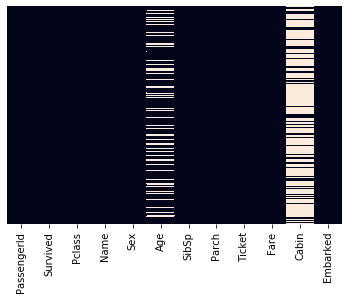

In [3]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False)

<h3>i) Delete</h3> 
    You could simply delete the rows containing missing values. This technique is more suitable and effective when a number of missing values row count is insignificant (say < 5%) compare with the overall record count. You can achieve this using Panda’s dropna() function.



In [4]:
# We want to drop the columns which contain Missing values, so axis=1
df.dropna(axis=1).head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500


In [5]:
df.drop(axis=1, labels='Cabin', inplace=True)

and now we can see that 'Age' Column has been dropped temporarily and 'Cabin' Column permanently. <br>
<h3>ii) Replace with the summary</h3>
This is probably the most commonly used imputation technique. Summarization here is the mean, mode, or median for a respective column. For continuous or quantitative variables, either mean/average or mode or median value of the respective column can be used to replace the missing values. Whereas for categorical or qualitative variables, the mode (most frequent) summation technique works better. You can achieve this using Panda’s fillna() function.We can also use imputer method in Scikit-Learn.<br>

In [6]:
# Here we are replacing NaN values in 'Age' column with 18
df['Age'].fillna(18).head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [7]:
df['Age'].fillna(df['Age'].mean()).head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [8]:
from sklearn import impute

# creating an object of imputer, there are many other options, you can see
im = impute.SimpleImputer(missing_values=np.nan,strategy='mean')
# im = impute.SimpleImputer(missing_values=np.nan,strategy='constant',fill_value=18)

#fitting and trasnforming our 'Age' column to SimpleImputer
dd = im.fit_transform(df['Age'].values[:,np.newaxis])

pd.DataFrame(dd).head()
#Now if we want to concat or replace 'Age' column with 'dd', we can also do so

,0
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0


<h3>iii) Use a predictive model</h3>
    This is an advanced technique. Here you can train a regression model for continuous variables and a classification model for categorical variables with the available data and use the model to predict the missing values.

=======================================================================================================================
<h2>2) Handling Categorical Data</h2>
Most of the ML libraries are designed to work well with numerical variables. So categorical variables in their original form of text description can’t be directly used for model building. Let’s learn some of the common methods of handling categorical data, based on their number of levels.

<h3>i) Create a dummy variable</h3>
This is a Boolean variable that indicates the presence of a category with the value 1 and 0 for absence. You should create k-1 dummy variables, where k is the number of levels. Scikit-learn provides a useful function, One Hot Encoder, to create a dummy variable for a given categorical variable (Listing 3-1).<br>

In [9]:
df_dummies = pd.get_dummies(df[['Sex','Embarked']])

In [10]:
df_dummies.head(5)

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1


In [11]:
# If we use drop_first in our get_dummies it would be nicer for our model.
df_dummies = pd.get_dummies(df[['Sex','Embarked']],drop_first=True)
df_dummies.head(5)

,Sex_male,Embarked_Q,Embarked_S
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1


<h3>ii) Convert to number </h3>
Another simple method is to represent the text description  of each level with a number by using the Label Encoder function of Scikit-learn. If the number of levels is high (example zip code, state, etc.), then you apply the business logic to combine levels to groups. For example, zip code or state can be combined with regions; however, in this method there is a risk of losing critical information. Another method is to combine categories based on similar frequency  (a new category can be high, medium, low).

In [12]:
# using pandas package's factorize function
Embarked_pd_factorized = pd.factorize(df['Embarked'])[0]
pd.DataFrame(Embarked_pd_factorized).head(5)

,0
0,0
1,1
2,0
3,0
4,0


In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

Sex_label_encoded = le.fit_transform(df['Sex'].values)

pd.DataFrame(Sex_label_encoded).head(5)

,0
0,1
1,0
2,0
3,0
4,1


<h2>3) Handling Text Data</h2>
As you know machines, as advanced as they may be, are not capable of understanding words and sentences in the same manner as humans do. In order to make documents’ corpora more palatable for computers, they must first be converted into some numerical structure. There are a few techniques used to achieve that, but in this post, I’m going to focus on Vector Space models a.k.a. Bag-of-Words (BoW) models.<br>

Bag-of-Words is a very intuitive approach to this problem, the methods comprise of:<br>
<ol>
    <li>Splitting the documents into tokens by following some sort of pattern.</li>
    <li>Assigning a weight to each token proportional to the frequency with which it shows up in the document and/or corpora. </li>
    <li>Creating a document-term matrix with each row representing a document and each column addressing a token. </li>
</ol>
The vectorizer objects provided by Scikit-Learn are quite reliable right out of the box, they allow us to perform all the above steps at once efficiently.<br>

<h3> i) Count Vectorizer</h3>
    The most straightforward one, it counts the number of times a token shows up in the document and uses this value as its weight.

<b>Note:</b> If we want to convert our data from Capital letters to lower case letter, use apply() function and use lower() function of strings

In [17]:
# here is our sample
sample = ['problem of evil','evil queen','horizon problem']

#like always import our required modul
from sklearn.feature_extraction.text import CountVectorizer 

#create an instance of CountVectorizer
vec = CountVectorizer()

# fit and transform our sample to bag of word
x_count_vec = vec.fit_transform(sample)

x_count_vec
# x_count_vec.toarray()
# vec.get_feature_names()

<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [19]:
pd.DataFrame(x_count_vec.toarray(), columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


<h3> ii) TF-IDF </h3>
There are some issues with this approach, however: the raw word counts lead to fea‐tures that put too much weight on words that appear very frequently, and this can besuboptimal  in  some  classification  algorithms.  One  approach  to  fix  this  is  known  as  term frequency–inverse document frequency (TF–IDF), which weights the word countsby a measure of how often they appear in the documents. The syntax for computingthese features is similar to the previous example:

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()

x_tfid_vec = vec.fit_transform(sample)

pd.DataFrame(x_tfid_vec.toarray(), columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,0.517856,0.000000,0.680919,0.517856,0.000000
1,0.605349,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.795961,0.000000,0.605349,0.000000


======================================================================================================================
<h2>4) Feature Scaling</h2>
The unit or scale of measurement varies for different variables, so an analysis with the raw measurement could be artificially skewed toward the variables with higher absolute values. Bringing all the different types of variable units in the same order of magnitude thus eliminates the potential outlier measurements that would misrepresent the finding and negatively affect the accuracy of the conclusion. Two broadly used methods for rescaling data are normalization and standardization.

<h3> i) Standardization (StandardScaler) </h3>
The standardization technique will transform the variables to have zero mean and standard deviation of one. The formula for standardization is given as follows, and the outcome is commonly known as z-scores.<br>
Z = (X-u)/o

In [14]:
from sklearn.preprocessing import StandardScaler

#create an instance of StandardScaler()
sc = StandardScaler()

# fit and transform our numerical data to StandardScalar
standardized_df = sc.fit_transform(df[['PassengerId', 'Survived', 'Pclass','Fare']])

# convert our standardized data to dataframe
standardized_df = pd.DataFrame(standardized_df, columns=['PassengerId', 'Survived', 'Pclass','Fare'])

# print standardized data-frame 
standardized_df.head()

,PassengerId,Survived,Pclass,Fare
0,-1.730108,-0.789272,0.827377,-0.502445
1,-1.726220,1.266990,-1.566107,0.786845
2,-1.722332,1.266990,0.827377,-0.488854
3,-1.718444,1.266990,-1.566107,0.420730
4,-1.714556,-0.789272,0.827377,-0.486337


<h3> ii) Normalization </h3>

In [15]:
from sklearn.preprocessing import Normalizer

#create an instance of Normalizer
nor = Normalizer()

#fit and transform our data to Normalizer
normalized_df = nor.fit_transform(df[['PassengerId', 'Survived', 'Pclass','Fare']])

#convert our normalized data to dataFrame
normalized_df = pd.DataFrame(normalized_df, columns=['PassengerId', 'Survived', 'Pclass','Fare'])

#print our data-frame
normalized_df.head()

# from sklearn.preprocessing import normalize
# normalized_df2 = normalize(df[['PassengerId', 'Survived', 'Pclass','Fare']])
# normalized_df2 = pd.DataFrame(normalized_df2, columns=['PassengerId', 'Survived', 'Pclass','Fare'])
# normalized_df2.head()

,PassengerId,Survived,Pclass,Fare
0,0.126428,0.000000,0.379284,0.916602
1,0.028041,0.014020,0.014020,0.999410
2,0.331688,0.110563,0.331688,0.876209
3,0.075090,0.018773,0.018773,0.996823
4,0.503021,0.000000,0.301813,0.809864
